In [1]:
# revisit on 5-15-2020 and 
# explore new features, keys()
# and pd.DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)

    # Obtain a score related to the model fit
    score = np.abs(model.score(data))

    return score


In [3]:
data = {
    'apples': [3, 2, 0, 9, 2, 1], 
    'oranges': [0, 7.6, 7, 2, 7, 6],
    'figs':[1.4, 11, 10.999, 3.99, 10, 2],
    'pears': [5, 2, 6, 2.45, 1, 7],
    'berries': [1.3, 4, 10, 0, 5,21],
    'tomatoes': [5, 15, 3, 4, 17,5],
    'onions': [11,3, 3, 1, 0, 10]
    
}
print(data)


{'apples': [3, 2, 0, 9, 2, 1], 'oranges': [0, 7.6, 7, 2, 7, 6], 'figs': [1.4, 11, 10.999, 3.99, 10, 2], 'pears': [5, 2, 6, 2.45, 1, 7], 'berries': [1.3, 4, 10, 0, 5, 21], 'tomatoes': [5, 15, 3, 4, 17, 5], 'onions': [11, 3, 3, 1, 0, 10]}


In [4]:

purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David', 'Bob', 'Karen'])

print(purchases)

        apples  oranges    figs  pears  berries  tomatoes  onions
June         3      0.0   1.400   5.00      1.3         5      11
Robert       2      7.6  11.000   2.00      4.0        15       3
Lily         0      7.0  10.999   6.00     10.0         3       3
David        9      2.0   3.990   2.45      0.0         4       1
Bob          2      7.0  10.000   1.00      5.0        17       0
Karen        1      6.0   2.000   7.00     21.0         5      10


In [5]:
Y1 = pd.DataFrame(np.round(purchases,0), columns = purchases.keys())
scaler = StandardScaler()
Y = scaler.fit_transform(Y1)
print(Y)

[[ 0.05725983 -1.69841555 -1.28745262  0.51465024 -0.82108966 -0.56446712
   1.48365074]
 [-0.28629917  1.01904933  1.05337032 -0.80873608 -0.39881498  1.21806062
  -0.3904344 ]
 [-0.97341717  0.67936622  1.05337032  0.95577901  0.44573438 -0.92097266
  -0.3904344 ]
 [ 2.11861384 -1.01904933 -0.58520574 -0.80873608 -0.96184788 -0.74271989
  -0.85895569]
 [-0.28629917  0.67936622  0.81928803 -1.24986486 -0.25805675  1.57456616
  -1.09321633]
 [-0.62985817  0.33968311 -1.05337032  1.39690778  1.99407488 -0.56446712
   1.2493901 ]]


In [6]:
pca = PCA(n_components=3)
W = pca.fit_transform(Y)
print(pca.explained_variance_ratio_)
print(pca.components_.shape)
print(pca.components_)
# pca is the model that will aslo be applied to the new dataset

[0.47490284 0.36382091 0.09439877]
(3, 7)
[[ 0.02085614  0.31884425  0.45893185 -0.46052569 -0.22325902  0.43935119
  -0.48200306]
 [ 0.57263082 -0.4893807  -0.25562415 -0.31044317 -0.50297039 -0.09228953
  -0.0968774 ]
 [ 0.29377403  0.14828313  0.27860086  0.21513651  0.14285469 -0.68832792
  -0.52307169]]


In [7]:
# apply k-means
scores = []
centers = list(range(1,5))

for center in centers:
    scores.append(get_kmeans_score(W, center))
X = zip(centers, scores)
for i in X:
        print(i)


(1, 39.19114589578841)
(2, 22.7953763741883)
(3, 9.034650751067606)
(4, 3.5873127155487725)


In [8]:
# from the above results, assume the elbow is 4 clusters
n_c = 4
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(W)
score = np.abs(model.score(W))
print('k-means score on ', n_c, ' clusters for the original dataset = ',score)
# model is the k-means model that will also be applied to the new dataset

k-means score on  4  clusters for the original dataset =  3.5873127155487725


In [9]:
NEW_data = {
    'apples': [9, 20, 10, 2, 12,1], 
    'oranges': [10, 3, 12, 1, 18, 5],
    'figs':[34, 11, 3.999, 1, 0, 12],
    'pears': [5, 2, 16, 2.45, 10, 11],
    'berries': [13, 4, 1, 2, 15, 4],
    'tomatoes': [7, 2, 1, 14, 27, 2],
    'onions': [1,10, 11, 2, 4, 10]
    
}
print(NEW_data)
purchases_N = pd.DataFrame(NEW_data)
purchases_N = pd.DataFrame(NEW_data, index=['June', 'Robert', 'Lily', 'David', 'Bob', 'Karen'])

print(purchases_N)



{'apples': [9, 20, 10, 2, 12, 1], 'oranges': [10, 3, 12, 1, 18, 5], 'figs': [34, 11, 3.999, 1, 0, 12], 'pears': [5, 2, 16, 2.45, 10, 11], 'berries': [13, 4, 1, 2, 15, 4], 'tomatoes': [7, 2, 1, 14, 27, 2], 'onions': [1, 10, 11, 2, 4, 10]}
        apples  oranges    figs  pears  berries  tomatoes  onions
June         9       10  34.000   5.00       13         7       1
Robert      20        3  11.000   2.00        4         2      10
Lily        10       12   3.999  16.00        1         1      11
David        2        1   1.000   2.45        2        14       2
Bob         12       18   0.000  10.00       15        27       4
Karen        1        5  12.000  11.00        4         2      10


In [10]:
YY1 = pd.DataFrame(np.round(purchases_N,0), columns = purchases_N.keys())
YY = scaler.fit_transform(YY1)
print(YY)

[[ 0.          0.31531701  2.05301801 -0.52075564  1.19506026 -0.19791729
  -1.29777137]
 [ 1.72493763 -0.88862066  0.05783149 -1.10660574 -0.45963856 -0.73769171
   0.89221782]
 [ 0.15681251  0.6592992  -0.54939919  1.62736139 -1.01120483 -0.84564659
   1.13554995]
 [-1.09768758 -1.23260285 -0.8096409  -1.10660574 -0.82734941  0.5577669
  -1.05443924]
 [ 0.47043754  1.69124577 -0.89638814  0.45566119  1.5627711   1.9611804
  -0.56777497]
 [-1.2545001  -0.54463847  0.14457873  0.65094455 -0.45963856 -0.73769171
   0.89221782]]


In [11]:
W1 = pca.transform(YY)
scoreNew = np.abs(model.score(W1))
print('k-means score on ', n_c, ' clusters for the new dataset = ',scoreNew)
print(scoreNew)
# k-means score the new dataset using the model determined on original ds 

k-means score on  4  clusters for the new dataset =  18.854197119878442
18.854197119878442


In [12]:
# predictions for the 2 datasets using the k-means model based on orig data
predict_purchases_dataset = model.predict(W)
predict_purchases_NewDataset = model.predict(W1)
print('original data')
print(W)
print('predictions --- original data')
print(predict_purchases_dataset)
print('new data')
print(W1)
print('predictions --- new data')
print(predict_purchases_NewDataset)

original data
[[-2.1480063   1.35464084 -0.987804  ]
 [ 1.98720186 -0.55484496 -0.50469076]
 [-0.07637938 -1.55723015  1.21569833]
 [ 0.1255879   2.74808564  0.95738418]
 [ 2.4385678  -0.22744336 -0.57285788]
 [-2.32697188 -1.76320801 -0.10772987]]
predictions --- original data
[3 0 1 2 0 1]
new data
[[ 1.55432032 -0.97453552  1.49247464]
 [-0.36273394  1.9642114   0.12843342]
 [-1.48120803 -0.12097487  0.18452493]
 [ 0.66016023  0.9919518  -0.91945421]
 [ 0.7142442  -1.3826139  -0.59241862]
 [-1.08478277 -0.47803891 -0.29356015]]
predictions --- new data
[0 2 1 0 0 1]


In [13]:
model.labels_
# the output matches the prediction on orig dataset:
# there are 2 customers in cluster 2, 2 customers in cluster 1, 1 in cluster 3 and 1 in 0

array([3, 0, 1, 2, 0, 1])

[0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.3333333333333333, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


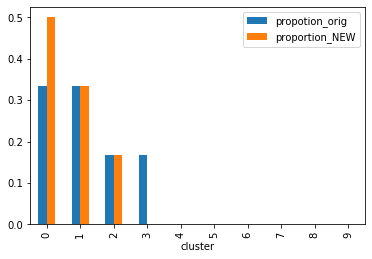

In [14]:
L = len(purchases.index)
x = [i for i in range (10)]
orig = []
NEW = []
for i in range(10):
    orig.append((predict_purchases_dataset== i).sum()/L)
    NEW.append((predict_purchases_NewDataset== i).sum()/L)

print(orig)
print(NEW)

df_summary = pd.DataFrame({'cluster' : x, 'propotion_orig' : orig, 'proportion_NEW': NEW})
df_summary.plot(x='cluster', y= ['propotion_orig','proportion_NEW' ], kind='bar')

In [15]:
#the above diagram shows that cluster 2 is represented by a large proportion in the new dataset

In [16]:
model.cluster_centers_

array([[ 2.21288483, -0.39114416, -0.53877432],
       [-1.20167563, -1.66021908,  0.55398423],
       [ 0.1255879 ,  2.74808564,  0.95738418],
       [-2.1480063 ,  1.35464084, -0.987804  ]])

In [17]:
IPCA = pca.inverse_transform(model.cluster_centers_)
APPROX = scaler.inverse_transform(IPCA)
approx_df =pd.DataFrame(APPROX, columns=purchases.columns)
print(approx_df)

      apples    oranges       figs      pears    berries   tomatoes     onions
0   6.856632  12.917453  21.462751   2.476402   4.464275  21.608906   3.263839
1   3.815409  11.140532  10.647411  13.750075  12.931495   1.829856   8.183790
2  20.845435   1.405542   5.974547   4.056566  -0.426516   0.890788   2.932460
3  11.810483  -0.521511  -8.194870   9.490480   4.634975   5.231688  12.172282


In [18]:
#so cluster 2 center has coordinates:
#    apples=7
#    oranges=13
#    figs=21
#    pears=2
#    berries=4
#    tomatoes=21
#    onions=3